In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt

In [88]:
# set attack column in each attack csv file
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["attack1_flows.csv","attack3_flows.csv","attack4_flows.csv","attack5_flows.csv","attack6_flows.csv","attack8_flows.csv"]
for file in file_names:
  df = pd.read_csv(path + file)
  print(file)
  attack = []
  for value in df['srcIP']:
    # print(value, value.split('.'))
    if value.split('.')[0] == '157':
      attack.append(1)
    else:
      attack.append(0)
  df['attack'] = attack
  # print(df.head())
  df.to_csv(path + 'modif_' + file, index = False)

attack1_flows.csv
attack3_flows.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


attack4_flows.csv
attack5_flows.csv
attack6_flows.csv
attack8_flows.csv


In [89]:
# combine all flow files into a single dataframe
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["modif_attack1_flows.csv","modif_attack3_flows.csv","modif_attack4_flows.csv","modif_attack5_flows.csv","modif_attack6_flows.csv","modif_attack8_flows.csv"]
main_df = pd.DataFrame()
attack_type = 1
for file in file_names:
  attack = []
  curr_dataframe = pd.read_csv(path+file)
  #iterate over all rows in curr data frame and add an extra column to the data frame, whose value = attack_type if last column value is 1 else 0
  for value in curr_dataframe["attack"]:
    if value == 0:
      attack.append(0)
    elif value == 1:
      attack.append(attack_type)
  curr_dataframe["attack_type"] = attack
  attack_type = attack_type+1
  main_df = main_df.append(curr_dataframe,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
main_df.shape
print(main_df.columns)

Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrDesc', 'numHdrs', 'hdrDesc', 'srcMac',
       ...
       'mqttClientID', 'mqttConAck', 'mqttTopic', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF', 'attack', 'attack_type'],
      dtype='object', length=114)


In [91]:
main_df.info()
cols = main_df.columns
for col in cols:
  print(col, end = ',')
  if col == 'dstPort' or col == 'minIAT' or col == 'ip6OptHH_D' or col == 'tcpMaxWinSz' or col == 'tcpTmS' or col == 'icmpStat' or col == 'connDip':
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Columns: 114 entries, %dir to attack_type
dtypes: float64(24), int64(53), object(37)
memory usage: 211.4+ MB
%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,dstMac,ethType,srcIP,srcIPCC,srcIPOrg,srcPort,dstIP,dstIPCC,dstIPOrg,dstPort,

l4Proto,macStat,macPairs,srcMac_dstMac_numP,dstPortClassN,dstPortClass,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,stdPktSize,minIAT,

maxIAT,aveIAT,stdIAT,pktps,bytps,pktAsm,bytAsm,tcpFStat,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,ipTTLChg,ipToS,ipFlags,ipOptCnt,ipOptCpCl_Num,ip6OptCntHH_D,ip6OptHH_D,

tcpISeqN,tcpPSeqCnt,tcpSeqSntBytes,tcpSeqFaultCnt,tcpPAckCnt,tcpFlwLssAckRcvdBytes,tcpAckFaultCnt,tcpBFlgtMx,tcpInitWinSz,tcpAveWinSz,tcpMinWinSz,tcpMaxWinSz,

tcpWinSzDwnCnt,tcpWinSzUpCnt,tcpWinSzChgDirCnt,tcpWinSzThRt,tcpFlags,tcpAnomaly,tcpOptPktCnt,tcpOptCnt,tcpOptions,tcpMSS,tcpWS,tcpMPTBF,tcpMPF,tcpMPAID,t

In [92]:
print(main_df['attack'].unique())
print(main_df['attack_type'].value_counts())
print(main_df['attack'].value_counts())

[0 1]
0    133840
3    100494
4      2488
5      1963
6      1626
1      1481
2      1138
Name: attack_type, dtype: int64
0    133840
1    109190
Name: attack, dtype: int64


In [93]:
main_df.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,mqttClientID,mqttConAck,mqttTopic,connSip,connDip,connSipDip,connSipDprt,connF,attack,attack_type
0,A,4,0x0400000000004000,1.643436e+09,1.643436e+09,0.067943,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
1,B,4,0x0400000000004001,1.643436e+09,1.643436e+09,0.000093,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
2,A,6,0x0400000000004000,1.643436e+09,1.643436e+09,0.030442,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
3,B,6,0x0400000000004001,1.643436e+09,1.643436e+09,0.000068,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
4,A,7,0x0400000000004000,1.643436e+09,1.643436e+09,1.065499,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,B80MJZHREG,0x00,test,1,3,4,4,4.0,0,0


In [94]:
nunique = main_df.nunique()
cols_to_drop = nunique[nunique == 1].index
main_df.drop(cols_to_drop, axis=1, inplace = True)
print(main_df.shape)
print(main_df.columns)

(243030, 98)
Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrs', 'hdrDesc', 'srcMac', 'dstMac', 'ethType', 'srcIP', 'srcIPCC',
       'srcIPOrg', 'srcPort', 'dstIP', 'dstIPCC', 'dstIPOrg', 'dstPort',
       'l4Proto', 'srcMac_dstMac_numP', 'dstPortClassN', 'dstPortClass',
       'numPktsSnt', 'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz',
       'maxPktSz', 'avePktSize', 'stdPktSize', 'maxIAT', 'aveIAT', 'stdIAT',
       'pktps', 'bytps', 'pktAsm', 'bytAsm', 'tcpFStat', 'ipMindIPID',
       'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipToS', 'ipFlags',
       'tcpISeqN', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt',
       'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt', 'tcpBFlgtMx',
       'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz',
       'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 'tcpFlags',
       'tcpAnomaly', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpOptions', 'tcpMSS',
       'tcpWS', 't

In [95]:
cols_to_drop = ['connSip','connDip','connSipDip','connSipDprt','connF','timeFirst','timeLast','tcpBtm','tcpUtm','tcpTmER','tcpTmS','flowInd','hdrDesc','srcMac','dstMac','srcIP','srcIPCC','srcIPOrg','srcPort','dstIP','dstIPCC','dstIPOrg','dstPort','srcMac_dstMac_numP','dstPortClass','tcpISeqN','mqttClientID','mqttTopic','icmpBFTypH_TypL_Code']
print(len(cols_to_drop))

29


In [96]:
main_df.drop(cols_to_drop, axis = 1, inplace = True)
main_df.shape

(243030, 69)

In [97]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,A,0x0400000000004000,0.067943,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
1,B,0x0400000000004001,0.000093,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
2,A,0x0400000000004000,0.030442,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
3,B,0x0400000000004001,0.000068,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
4,A,0x0400000000004000,1.065499,3,0x0800,6,1883,8,5,57,...,0x52,0x00,0,0,0x81,0x400a,4,0x00,0,0
5,B,0x0400000000004001,1.033547,3,0x0800,6,1883,5,8,4,...,0x02,0x00,0,0,0x81,0x0004,0,0x01,0,0
6,A,0x0400000000004000,0.369930,3,0x0800,6,1883,4,4,56,...,0x02,0x00,0,0,0x01,0x4002,4,0x00,1,1
7,B,0x0400000000004001,0.370033,3,0x0800,6,1883,4,4,4,...,0x42,0x00,0,0,0x81,0x0004,0,0x20,0,0
8,A,0x0400000000004000,0.030956,3,0x0800,6,1883,3,1,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
9,B,0x0400000000004001,0.000000,3,0x0800,6,1883,1,3,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0


In [98]:
hex_cols = ['flowStat','ethType','ipToS','ipFlags','tcpFlags','tcpFStat','tcpAnomaly','tcpOptions','tcpStatesAFlags','icmpStat','mqttStat','mqttCPT','mqttConAck']
for col in hex_cols:
  main_df[col] = main_df[col].apply(int, base=16)

In [99]:
import numpy as np
main_df['%dir'] = np.where(main_df['%dir'] == 'A', 1, main_df['%dir'])
main_df['%dir'] = np.where(main_df['%dir'] == 'B', -1, main_df['%dir'])

In [100]:
convert_dict = {'%dir':int}
main_df = main_df.astype(convert_dict)

In [101]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   %dir                   243030 non-null  int64  
 1   flowStat               243030 non-null  int64  
 2   duration               243030 non-null  float64
 3   numHdrs                243030 non-null  int64  
 4   ethType                243030 non-null  int64  
 5   l4Proto                243030 non-null  int64  
 6   dstPortClassN          243030 non-null  int64  
 7   numPktsSnt             243030 non-null  int64  
 8   numPktsRcvd            243030 non-null  int64  
 9   numBytesSnt            243030 non-null  int64  
 10  numBytesRcvd           243030 non-null  int64  
 11  minPktSz               243030 non-null  int64  
 12  maxPktSz               243030 non-null  int64  
 13  avePktSize             243030 non-null  float64
 14  stdPktSize             243030 non-nu

In [102]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,1,288230376151728128,0.067943,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
1,-1,288230376151728129,0.000093,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
2,1,288230376151728128,0.030442,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
3,-1,288230376151728129,0.000068,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
4,1,288230376151728128,1.065499,3,2048,6,1883,8,5,57,...,82,0,0,0,129,16394,4,0,0,0
5,-1,288230376151728129,1.033547,3,2048,6,1883,5,8,4,...,2,0,0,0,129,4,0,1,0,0
6,1,288230376151728128,0.369930,3,2048,6,1883,4,4,56,...,2,0,0,0,1,16386,4,0,1,1
7,-1,288230376151728129,0.370033,3,2048,6,1883,4,4,4,...,66,0,0,0,129,4,0,32,0,0
8,1,288230376151728128,0.030956,3,2048,6,1883,3,1,2,...,83,0,0,0,1,16384,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,1883,1,3,0,...,3,0,0,0,1,0,0,0,0,0


In [103]:
grouped_dataframe = main_df.groupby(main_df.attack_type)
normal_df = grouped_dataframe.get_group(0).copy(); normal_df_frac = normal_df.sample(frac = 0.02)
attack1_df = grouped_dataframe.get_group(1).copy()
attack3_df = grouped_dataframe.get_group(2).copy()
attack4_df = grouped_dataframe.get_group(3).copy(); attack4_df_frac = attack4_df.sample(frac = 0.02)
attack5_df = grouped_dataframe.get_group(4).copy()
attack6_df = grouped_dataframe.get_group(5).copy()
attack8_df = grouped_dataframe.get_group(6).copy()

sampled_main_df = pd.DataFrame()
sampled_main_df = sampled_main_df.append([normal_df_frac,attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)
# sampled_main_df = sampled_main_df.append([attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)

In [104]:
sampled_main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
1,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
2,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
3,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
4,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
5,-1,288230376151728129,2.770051,3,2048,6,1883,38,40,4,...,0,0,0,0,129,4,0,1,0,0
6,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
7,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
8,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,80,1,1,0,...,67,0,0,0,0,0,0,0,0,0


In [105]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scalable_columns = sampled_main_df.columns.values.tolist()
scalable_columns.remove('attack')
scalable_columns.remove('attack_type')
sampled_main_df[scalable_columns] = mms.fit_transform(sampled_main_df[scalable_columns])

In [106]:
y_binary = sampled_main_df['attack']
y_multi = sampled_main_df['attack_type']
sampled_main_df.drop(['attack','attack_type'], axis = 1, inplace = True)
print(sampled_main_df.shape)

(13383, 67)


In [107]:
print(y_multi)

0        0
1        0
2        0
3        0
4        0
        ..
13378    6
13379    6
13380    6
13381    6
13382    6
Name: attack_type, Length: 13383, dtype: int64


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     sampled_main_df, y_multi, test_size=0.20, random_state=42)

In [123]:
print(y_train)
print(y_train.value_counts())

9462     4
414      0
6556     3
13101    6
10878    5
        ..
11964    6
5191     2
5390     3
860      0
7270     3
Name: attack_type, Length: 10706, dtype: int64
0    2141
4    1968
3    1607
5    1590
6    1304
1    1167
2     929
Name: attack_type, dtype: int64


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import time

In [113]:
sampled_main_df_cols = sampled_main_df.columns

In [114]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

0.1030416488647461 seconds
0.9275308180799402 0.9290810761431607 0.9275308180799402 0.9043638284444852
0.9275308180799402 0.9290810761431607 0.9275308180799402 0.9279702243856244
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       536
           1       0.80      0.75      0.78       314
           2       0.65      0.73      0.69       209
           3       1.00      1.00      1.00       403
           4       0.94      0.96      0.95       520
           5       0.94      0.91      0.92       373
           6       1.00      1.00      1.00       322

    accuracy                           0.93      2677
   macro avg       0.90      0.91      0.90      2677
weighted avg       0.93      0.93      0.93      2677



In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

1.2679152488708496 seconds
0.9342547627941726 0.9464841290977225 0.9342547627941726 0.9147740821232634
0.9342547627941726 0.9464841290977225 0.9342547627941726 0.9373259346099918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.85      0.73      0.78       314
           2       0.60      0.89      0.71       209
           3       1.00      1.00      1.00       403
           4       0.99      0.94      0.97       520
           5       0.99      0.90      0.94       373
           6       1.00      1.00      1.00       322

    accuracy                           0.93      2677
   macro avg       0.92      0.92      0.91      2677
weighted avg       0.95      0.93      0.94      2677



In [116]:
print(clf.feature_importances_)
sorted_idx = clf.feature_importances_.argsort()

[1.84942940e-02 0.00000000e+00 1.44114249e-02 4.52125158e-06
 2.15928776e-06 1.95878871e-05 1.70108523e-02 1.28914810e-02
 1.08645778e-02 2.85208406e-02 2.37152503e-03 1.51632059e-05
 3.47730256e-02 2.22338106e-02 4.02148703e-02 1.63885924e-02
 1.71949401e-02 1.70217573e-02 1.08110401e-02 2.28602179e-02
 5.80529289e-03 2.25978432e-02 2.87382544e-02 3.67592994e-03
 5.83105190e-03 4.40372562e-02 3.93278840e-02 0.00000000e+00
 0.00000000e+00 4.34867627e-02 2.06989201e-02 3.26958206e-02
 3.82464574e-05 1.32402176e-02 1.86226286e-03 4.77240475e-05
 2.21243597e-02 2.80857294e-02 2.54707191e-02 1.74158956e-02
 1.57871069e-02 7.72919665e-04 3.96940362e-03 6.43460153e-03
 5.78082269e-02 1.83874460e-02 1.56944517e-02 2.89415738e-02
 3.09510007e-02 2.13626696e-02 4.93629460e-03 1.39571414e-02
 4.00360039e-03 8.35347066e-05 2.56519835e-02 2.44471390e-02
 2.38539863e-02 2.44159563e-02 7.89933091e-04 9.10406830e-03
 1.87631333e-05 3.73121453e-06 3.88165365e-05 1.96695312e-02
 5.31903859e-03 2.312228

<BarContainer object of 67 artists>

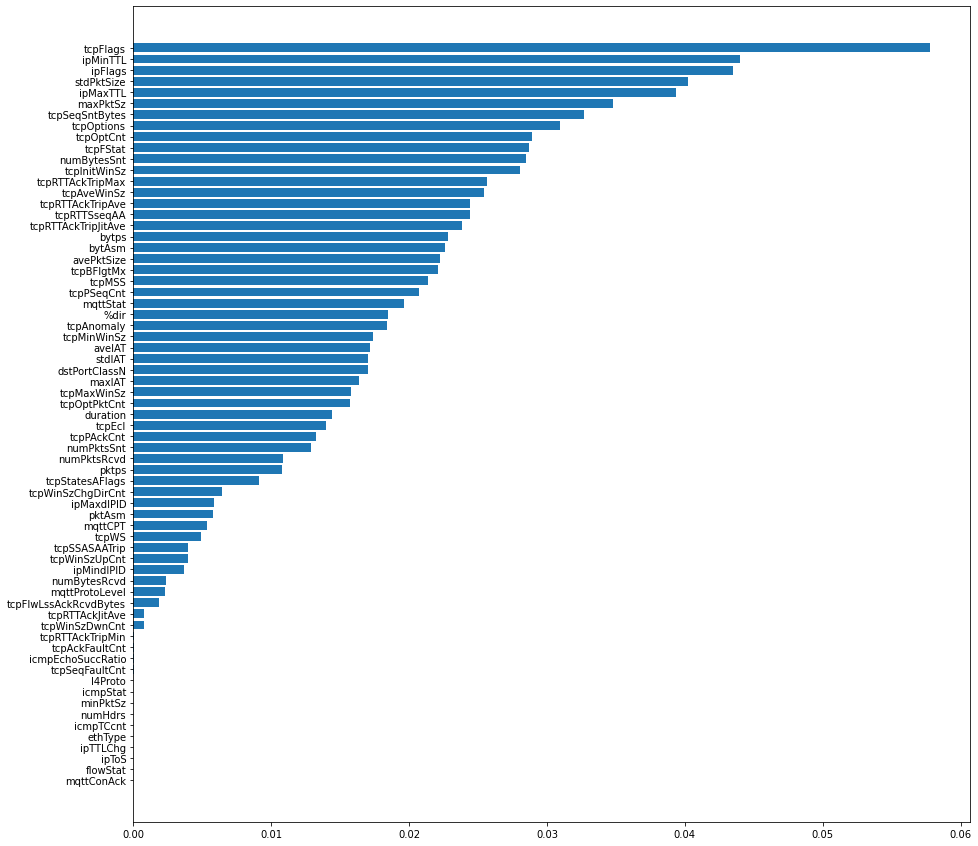

In [117]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.barh(sampled_main_df_cols[sorted_idx],clf.feature_importances_[sorted_idx])

In [118]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1,gamma='auto')
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

4.523596525192261 seconds
0.8531938737392604 0.8438961743434366 0.8531938737392604 0.7761337954162869
0.8531938737392604 0.8438961743434366 0.8531938737392604 0.8154431801673868
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.44      0.01      0.02       314
           2       0.49      0.98      0.65       209
           3       1.00      1.00      1.00       403
           4       0.74      0.94      0.83       520
           5       1.00      0.89      0.94       373
           6       1.00      0.98      0.99       322

    accuracy                           0.85      2677
   macro avg       0.81      0.83      0.78      2677
weighted avg       0.84      0.85      0.82      2677



In [119]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

0.03603935241699219 seconds
0.8042584983190139 0.8602416965559276 0.8042584983190139 0.7503193046730269
0.8042584983190139 0.8602416965559276 0.8042584983190139 0.7957324906220063
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       536
           1       0.44      0.05      0.09       314
           2       0.31      1.00      0.48       209
           3       1.00      1.00      1.00       403
           4       0.93      0.68      0.78       520
           5       0.97      0.89      0.93       373
           6       1.00      0.98      0.99       322

    accuracy                           0.80      2677
   macro avg       0.81      0.80      0.75      2677
weighted avg       0.86      0.80      0.80      2677



In [120]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=100)
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

13.867078304290771 seconds
0.9021292491595069 0.9377309522972381 0.9021292491595069 0.8729779165134008
0.9021292491595069 0.9377309522972381 0.9021292491595069 0.9024911255985631
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.94      0.44      0.60       314
           2       0.49      0.98      0.65       209
           3       1.00      1.00      1.00       403
           4       0.93      0.93      0.93       520
           5       1.00      0.89      0.94       373
           6       1.00      0.99      0.99       322

    accuracy                           0.90      2677
   macro avg       0.91      0.89      0.87      2677
weighted avg       0.94      0.90      0.90      2677



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [121]:
from xgboost import XGBClassifier
clf = XGBClassifier()
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")

print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

19.723320722579956 seconds
0.9398580500560328 0.9531692915945363 0.9398580500560328 0.922632266620769
0.9398580500560328 0.9531692915945363 0.9398580500560328 0.9430829423912793
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.87      0.76      0.81       314
           2       0.61      0.92      0.74       209
           3       1.00      1.00      1.00       403
           4       0.99      0.94      0.97       520
           5       1.00      0.90      0.94       373
           6       1.00      1.00      1.00       322

    accuracy                           0.94      2677
   macro avg       0.93      0.93      0.92      2677
weighted avg       0.95      0.94      0.94      2677

